In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
bf = pd.read_json('./business.json',lines=True)

In [3]:
rcl = bf.review_count.tolist()

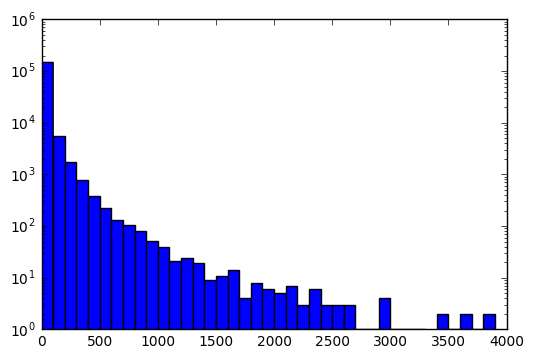

In [4]:
plt.hist(rcl,log=True, bins=[i for i in range(0,4000,100)])
plt.show()

In [5]:
bfgc = bf.groupby(['city'])

In [6]:
citylist = list(bfgc.groups.keys())

In [36]:
cate = {}
for i in citylist:
    cate[i] = {}
    count = 0
    g = bfgc.get_group(i)
    for j in g.categories:
        for m in j:
            count += 1
            if m in cate[i]:
                cate[i][m] += 1
            else:
                cate[i][m] = 1
    cate[i]['count'] = count

In [53]:
top_city = sorted(cate, key=lambda x: (cate[x]['count']), reverse=True)[:10]

In [59]:
def plot_pie_chart(data_d, data_l,title):
    colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]
    plt.pie(
        # using data total)arrests
        data_d,
        # with the labels being officer names
        labels=data_l,
        # with no shadows
        shadow=False,
        # with colors
        colors=colors,
        # with one slide exploded out
        # with the start angle at 90%
        startangle=90,
        # with the percent listed as a fraction
        autopct='%1.1f%%',
        )

    # View the plot drop above
    plt.axis('equal')
    plt.title(title)
    # View the plot
    plt.tight_layout()
    plt.show()

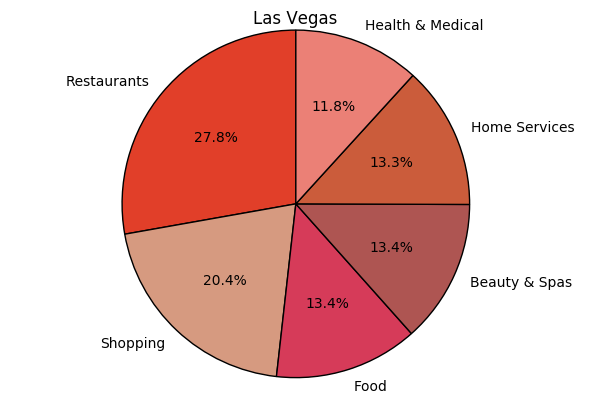

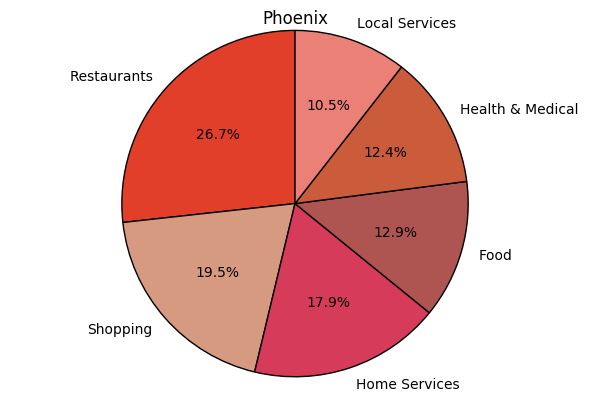

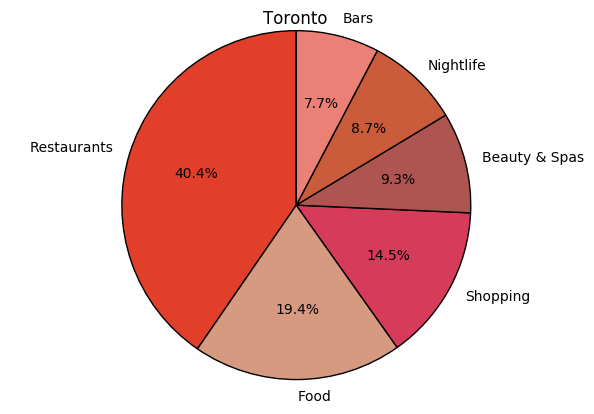

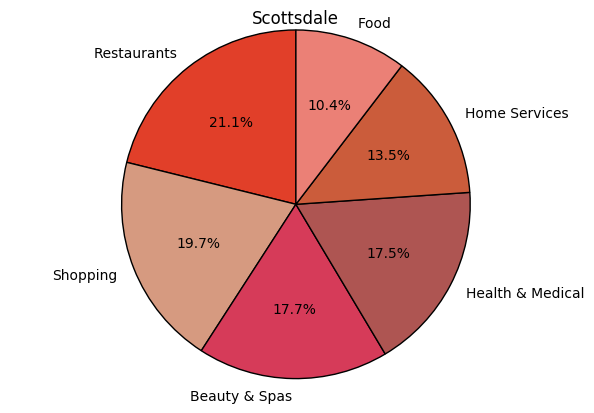

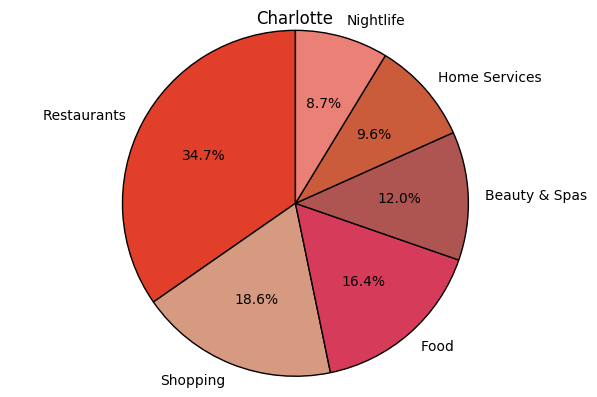

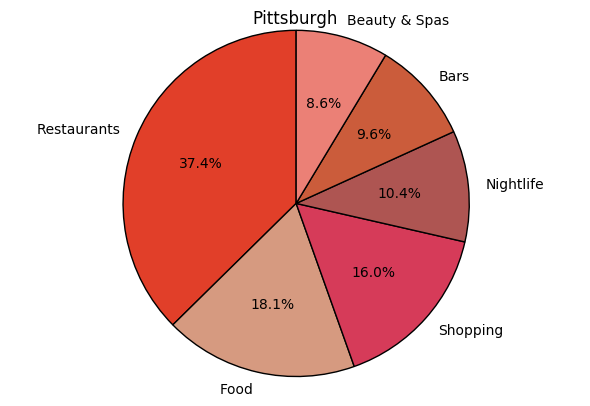

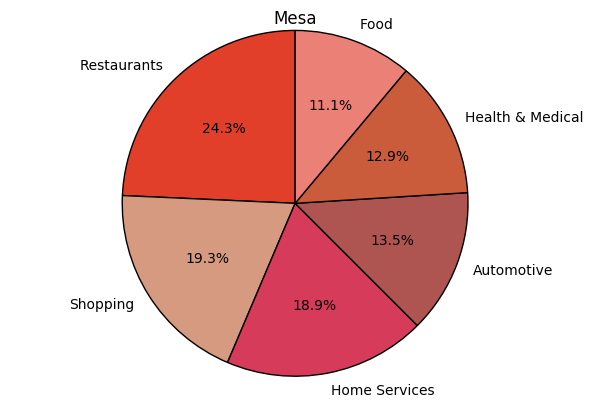

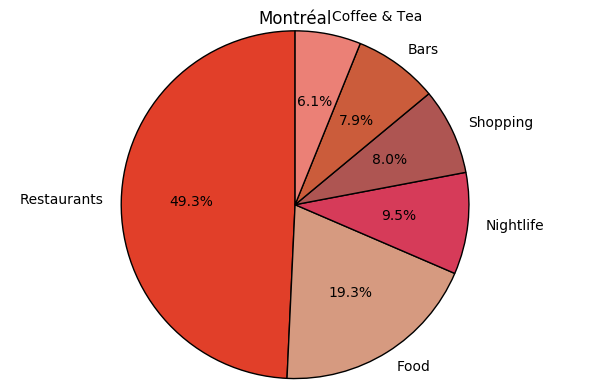

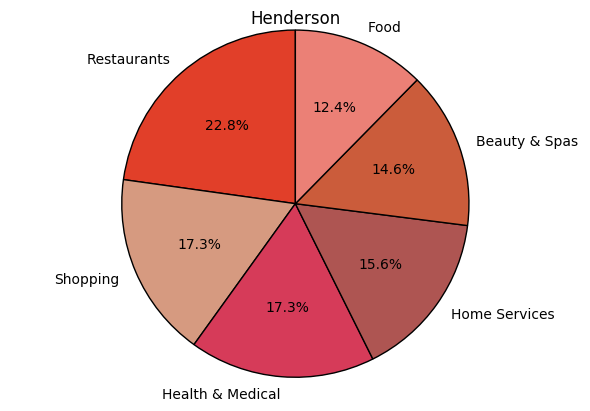

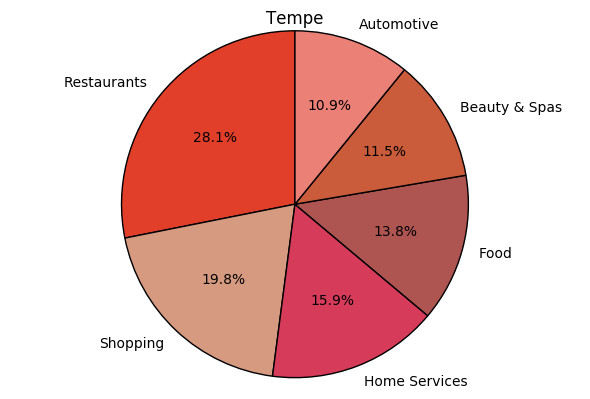

In [60]:
for i in top_city:
    data = sorted(cate[i].items(), key=lambda x:x[1], reverse=True)[:7]
    data_d = [x[1] for x in data if x[0] != 'count']
    data_l = [x[0] for x in data if x[0] != 'count']
    plot_pie_chart(data_d, data_l, i)